<a href="https://colab.research.google.com/github/seodalzzz/Machine_Learning_implementation/blob/main/code/k_means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(4242)

In [ ]:
# data generation set-up
# data : sampled from 3 Gaussians

pi_true = np.array([0.2,0.5,0.3])
mu_true = np.array([[2,2],[-1,-1],[0,-1.4]])
sigma_true = np.zeros((3,2,2))
sigma_true[0] = np.array([[1.,0.3],[0.2,0.2]])
sigma_true[1] = np.array([[0.5,0.8],[0.8,0.5]])
sigma_true[2] = np.array([[1.3,0.3],[0.2,0.4]])

colors = sns.color_palette("husl",8)
col = [colors[0],colors[1],colors[3],colors[5],colors[7]]
cols = ['b','g','r']

In [ ]:
# generate N=100 data instances

N = 100
data = np.zeros((N,3))

In [ ]:
# data generation

for i in range(N):
    z = np.random.random()
    idx = 0
    interval = 0

    for j in range(len(pi_true)):
        if z >= interval and z <= interval+pi_true[j]:
            idx = j
            break
        else:
            interval += pi_true[j]

    x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])
    data[i] = (x,y,idx)

<ipython-input-8-db51f16c8841>:15: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])


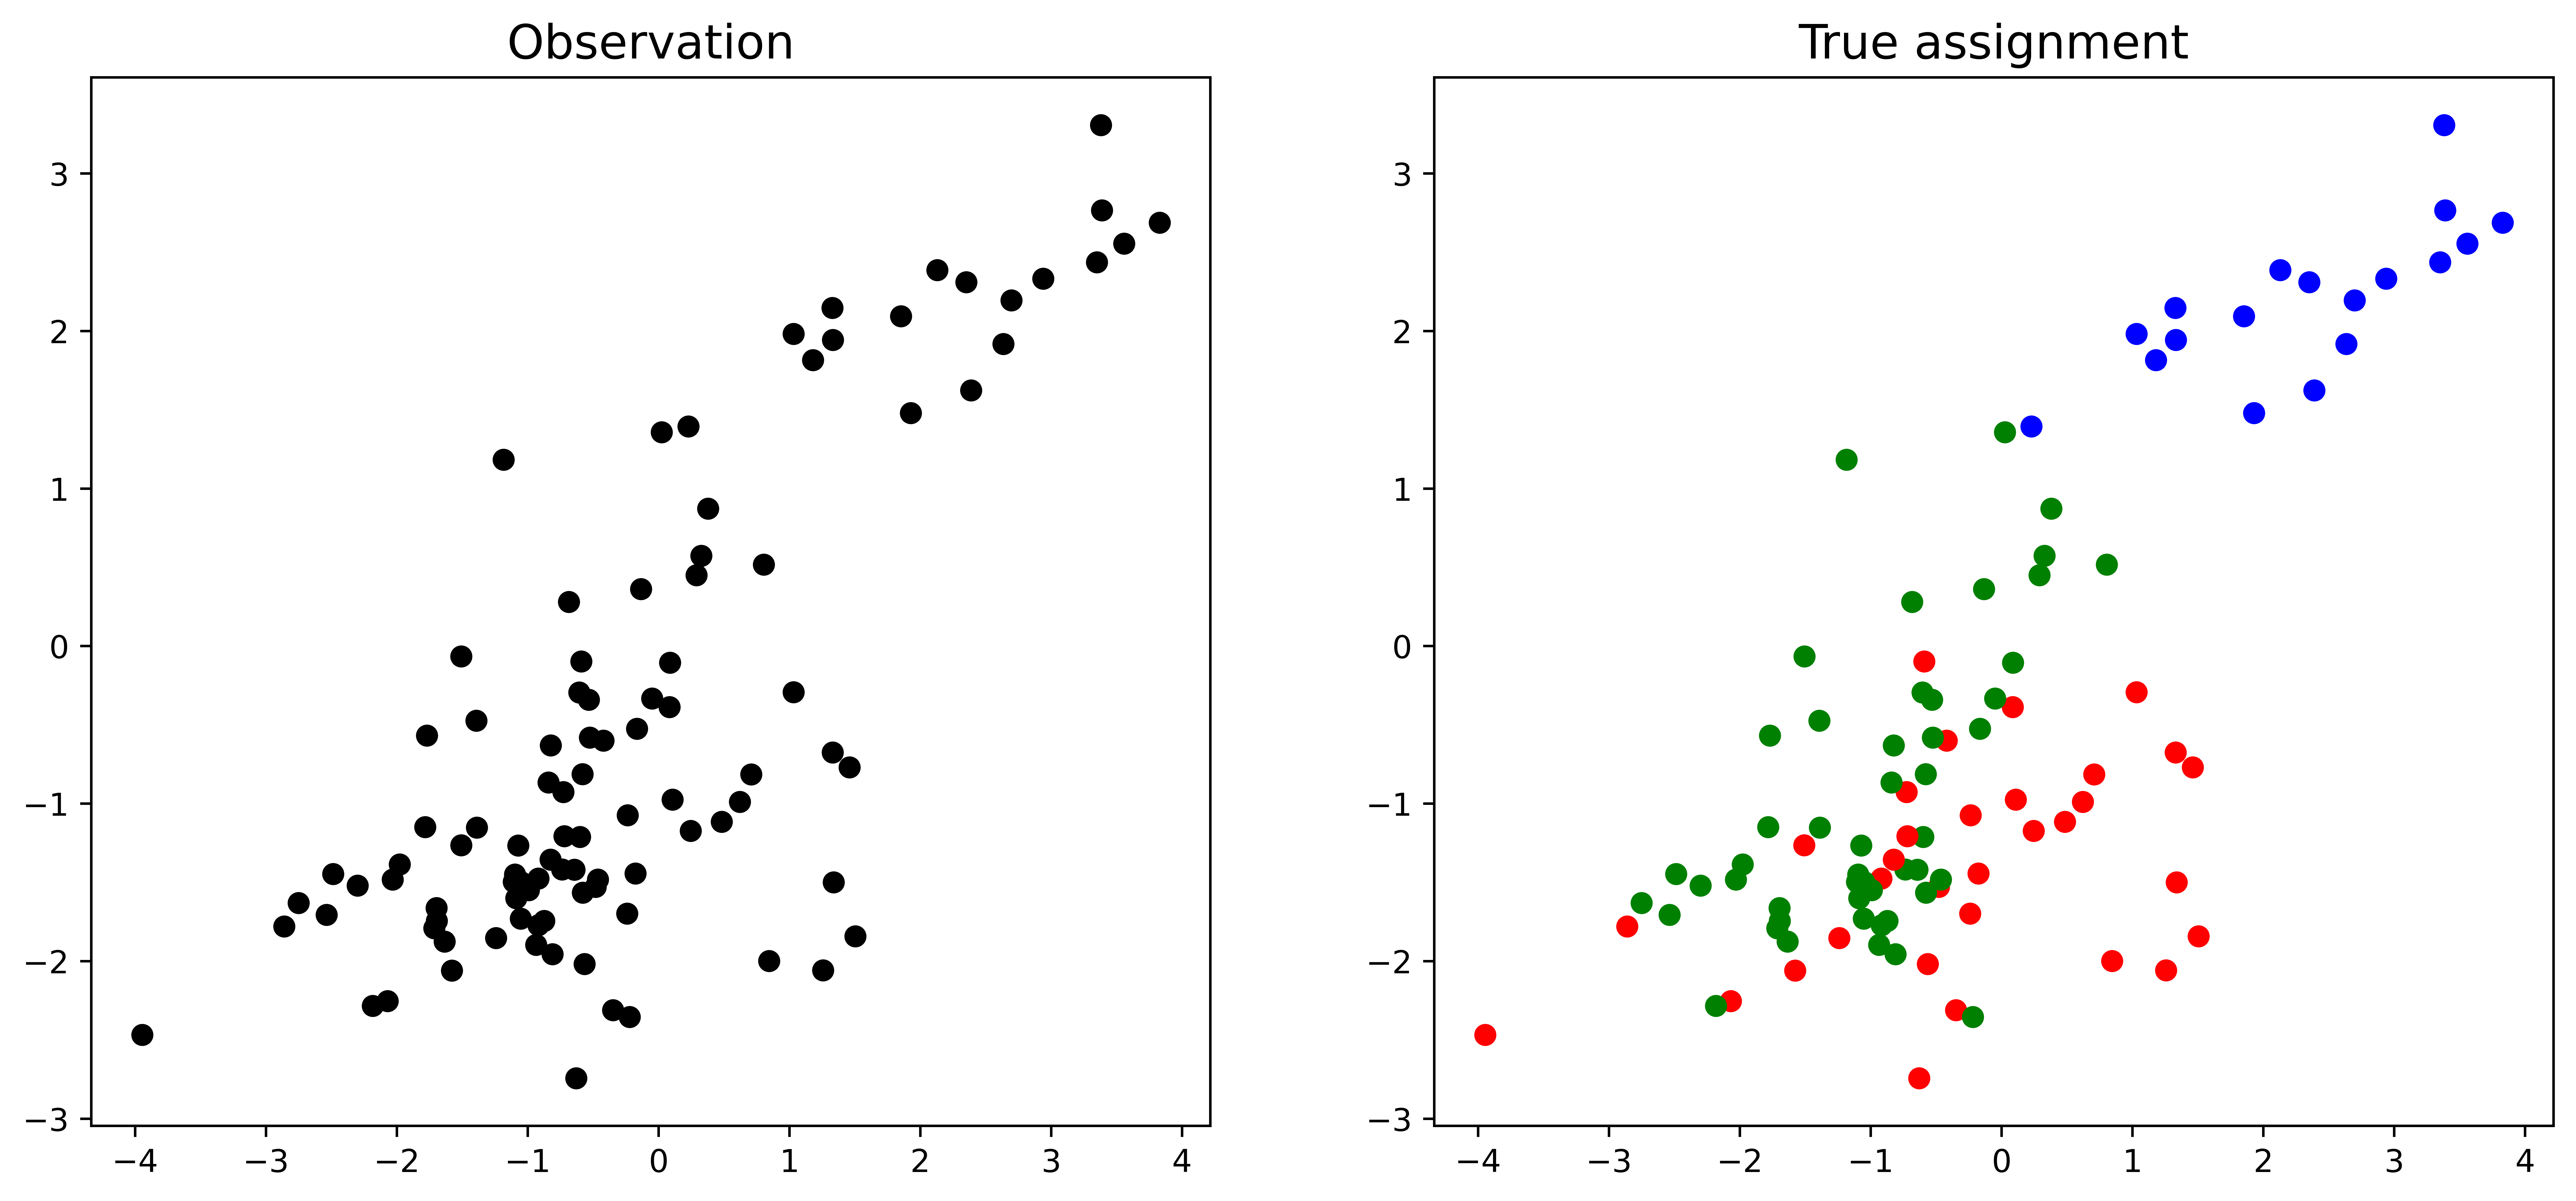

In [ ]:
# plot generated data

plt.figure(1,figsize=(14,6),dpi=900)

plt.subplot(121)
plt.title('Observation',fontsize=15)
plt.plot(data[:,0],data[:,1],'ko')

plt.subplot(122)
plt.title('True assignment',fontsize=15)
for i in range(N):
    plt.plot(data[i,0],data[i,1],'o',c=cols[int(data[i,2])])

plt.show()

In [ ]:
# k-means clustering is based on Euclidean distance

def distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

In [ ]:
# assume k=3 clusters

k = 3
itrEM = 128
showVisualization = [1,3,7,15,31,63,127]

In [ ]:
centroid = np.zeros((itrEM+1,k,2))

#Objective funtion
sumDistance = np.zeros(itrEM)

assignment = np.zeros(N)

In [ ]:
# initial centroids by choosing from data instances
rand_idx=np.random.randint(100,size=k)

centroid[0,:,:] = data[rand_idx,0:2]

In [ ]:
plt.figure(1,figsize=(14,25),dpi=900)
plotN = 1
delta = 1e-10

# training starts from here

for i in range(itrEM):

    ############ E-step: update cluster assignments given centroids
    for j in range(N):
      distance_cal=np.zeros(k)
      for l in range(k):
        distance_cal[l]=distance(data[j,0:2],centroid[i,l])
      assignment[j]=int(np.argmin(distance_cal))
      sumDistance[i]+=np.min(distance_cal)
    ############ E-step ends here

    cntGroups = np.zeros(k)+delta


    ############ M-step: update centroids given cluster assignments
    for m in range(k):
      centroid[i+1,m,0]=np.mean(data[assignment==m,0])
      centroid[i+1,m,1]=np.mean(data[assignment==m,1])

    for l in range(k):
      cntGroups[l]=sum(assignment==l)

    ############ M-step ends here

    if i in showVisualization:
        plt.subplot(len(showVisualization),2,plotN)
        plt.title('iteration = %s'%(i),fontsize = 15)
        plotN += 1

        for j in range(k):

            points = np.zeros((int(cntGroups[j]),2))
            cntTemp = 0

            for l in range(N):
                if assignment[l] == j:
                    points[cntTemp] = data[l,:2]
                    cntTemp += 1

            plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],color='k')

plt.subplot(len(showVisualization),2,plotN+1)
plt.title('final = %s'%(i),fontsize = 15)
for j in range(k):
    points = np.zeros((int(cntGroups[j]),2))
    cntTemp = 0
    for l in range(N):
        if assignment[l] == j:
            points[cntTemp] = data[l,:2]
            cntTemp += 1
    plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
    plt.plot(centroid[-1,j,0],centroid[-1,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')

plt.subplot(len(showVisualization),2,plotN+2)
plt.title('iteration vs. Sum of distance',fontsize=15)
plt.xlabel('EM Iteration',fontsize=15)
plt.ylabel('Sum of Distance',fontsize=15)
plt.plot(sumDistance[:])

plt.show()